In [77]:
from pylab import *
from matplotlib import rc
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.font_manager import FontProperties

<IPython.core.display.Javascript object>


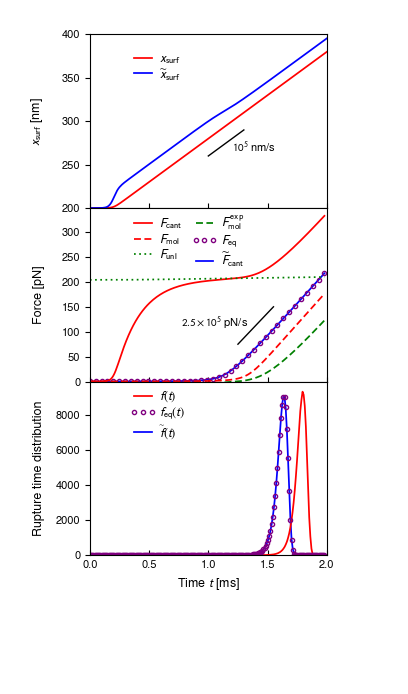

In [141]:
%matplotlib notebook
clf()
xoff=0.22
yoff=0.2
width=0.8-xoff
height=0.95-yoff


fig_width_pt = 246.0
inches_per_pt = 1.0/72.27
golden_mean = (sqrt(5)-1.0)/2.0
fig_width = fig_width_pt*inches_per_pt
fig_height = fig_width_pt*inches_per_pt*golden_mean
fig_size =  [1.2*fig_width,3.3*fig_height]
params = {'backend': 'pdf',
          'axes.labelsize': 9,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'text.usetex': False,
          'figure.figsize': fig_size,
          'figure.subplot.left': xoff,
          'figure.subplot.bottom': yoff,
          'figure.subplot.right': xoff+width,
          'figure.subplot.top': yoff+height,
          'mathtext.fontset': 'stixsans'}

rcParams.update(params)
rc('font',**{'family':'sans-serif','sans-serif':['Tex Gyre Heros']})
        
figure(1)

gs1=gridspec.GridSpec(3,1)
gs1.update(hspace=0.0,wspace=0.2)

sta=np.loadtxt('stage_protocol_1e5.txt',delimiter='\t')
fno=np.loadtxt('forces_nocd_1e5.txt',delimiter='\t')
fcd=np.loadtxt('forces_cd_1e5.txt',delimiter='\t')
pno=np.loadtxt('pt_nocd_1e5.txt',delimiter='\t')
pcd=np.loadtxt('pt_cd_1e5.txt',delimiter='\t')
peq=np.loadtxt('pt_eq_1e5.txt',delimiter='\t')

subplot(gs1[0,0])

l1,=plot([e[0]/1e-3 for e in sta],[e[1] for e in sta],color='r',lw=1.25)
l2,=plot([e[0]/1e-3 for e in sta],[e[2] for e in sta],color='b',lw=1.25)
    
plot([1.0,1.3],[10+250.0,10+250.0+0.3*1e5*1e-3],color='k',lw=1)
text(1.2,265,r'$10^5$ nm/s',fontsize=8)

setp(gca(),xlim=[0,2],ylim=[200,400],xticklabels=[])
gca().tick_params(axis='x',which='both',direction="in")
ylabel(r'$x_{\rm surf}$ [nm]')
gca().yaxis.set_label_coords(-0.19,0.5)

leg=legend([l1,l2],[r'$x_{\rm surf}$',r'$\widetilde{x}_{\rm surf}$'],loc=(0.15,0.7),numpoints=3,prop = FontProperties(size=9),ncol=1,labelspacing=0.1,handlelength=2.0,handletextpad=0.3)
leg.draw_frame(0)

subplot(gs1[1,0])

fsc,=plot([e[0]/1e-3 for e in fcd],[e[1] for e in fcd],color='b',lw=1.25)
feq,=plot([e[0]/1e-3 for e in fno[::5]],[e[1] for e in fno[::5]],'go',mec='Purple',mfc='None',ms=3,mew=1)
#feq.set_dashes([2,2])

fsn,=plot([e[0]/1e-3 for e in fno],[e[2] for e in fno],color='r',lw=1.25)
fsn.set_dashes([4,2])

fspn,=plot([e[0]/1e-3 for e in fno],[e[3] for e in fno],color='r',lw=1.25)

fd,=plot([e[0]/1e-3 for e in fno],[e[4] for e in fno],color='g',lw=1.25)
fd.set_dashes([1,2])

fdiff,=plot([e[0]/1e-3 for e in fno],[e[3]-e[4] for e in fno],color='g',lw=1.25)
fdiff.set_dashes([4,2])

plot([0.25+1.0,0.25+1.3],[75.0,75+0.3*2.5e5*1e-3],color='k',lw=1)
text(0.77,110,r'$2.5\times 10^5$ pN/s',fontsize=8)


setp(gca(),xlim=[0,2],ylim=[0,350-2],xticklabels=[])
gca().tick_params(axis='x',which='both',direction="in")
ylabel(r'Force [pN]')
gca().yaxis.set_label_coords(-0.19,0.5)

leg=legend([fspn,fsn,fd,fdiff,feq,fsc],[r'$F_{\rm cant}$',r'$F_{\rm mol}$',r'$F_{\rm unl}$',r'$F^{\rm exp}_{\rm mol}$',r'$F_{\rm eq}$',r'$\widetilde{F}_{\rm cant}$'],loc=(0.15,0.62),numpoints=3,prop = FontProperties(size=9),ncol=2,columnspacing=0.75,labelspacing=0.1,handlelength=2.0,handletextpad=0.3)
leg.draw_frame(0)


subplot(gs1[2,0])

l3,=plot([e[0]/1e-3 for e in pcd],[e[1] for e in pcd],color='b',lw=1.25)
#feq,=plot([e[0]/1e-3 for e in fno[::5]],[e[1] for e in fno[::5]],'go',mec='Purple',mfc='None',ms=3,mew=1)
#feq.set_dashes([2,2])

l1,=plot([e[0]/1e-3 for e in pno],[e[1] for e in pno],color='r',lw=1.25)

l2,=plot([e[0]/1e-3 for e in peq[::1]],[e[1] for e in peq[::1]],'go',mec='Purple',mfc='None',ms=3,mew=1)

leg=legend([l1,l2,l3],[r'$f(t)$',r'$f_{\rm eq}(t)$',r'$\widetilde{f}(t)$'],loc=(0.15,0.63),numpoints=3,prop = FontProperties(size=9),ncol=1,labelspacing=0.1,handlelength=2,handletextpad=0.3)
leg.draw_frame(0)


setp(gca(),xlim=[0,2],ylim=[0,9900])
gca().tick_params(axis='x',which='both',direction="in")
ylabel(r'Rupture time distribution')
gca().yaxis.set_label_coords(-0.19,0.5)

xlabel(r'Time $t$ [ms]')

show()
savefig('pulling_figs.svg')